In [8]:
import helper

import difflib 

import seaborn as sns
import numpy as np
import pandas as pd
import collections
import matplotlib.pyplot as plt

from scipy.stats.stats import pearsonr  
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')

In [17]:
# Load data
dataset = pd.read_csv('east_data.csv')
feature = pd.read_csv('east_features.csv')
# west_data = pd.read_csv('west_data_clean.csv')
# lower_data = pd.read_csv('lower_data_clean.csv')

# Create object
visual = helper.visualizer()
model = helper.modeling()
process = helper.data_processing()

In [18]:
daily_data = process.mape_distribution(dataset)

In [22]:
weathers =set(dataset['weather'])
weathers

{'cloudy', 'fog', 'partly-cloudy', 'rain', 'snow', 'sunny', 'wind'}

In [25]:
n_sunny = dataset[dataset['condition']==1][dataset['weather']=='sunny']
n_cloudy = dataset[dataset['condition']==1][dataset['weather']=='cloudy']
n_partly_cloudy = dataset[dataset['condition']==1][dataset['weather']=='partly-cloudy']
n_rain = dataset[dataset['condition']==1][dataset['weather']=='rain']
n_snow = dataset[dataset['condition']==1][dataset['weather']=='snow']
n_fog = dataset[dataset['condition']==1][dataset['weather']=='fog']
n_wind = dataset[dataset['condition']==1][dataset['weather']=='wind']

ab_sunny = dataset[dataset['condition']==0][dataset['weather']=='sunny']
ab_cloudy = dataset[dataset['condition']==0][dataset['weather']=='cloudy']
ab_p_cloudy = dataset[dataset['condition']==0][dataset['weather']=='partly-cloudy']
ab_rain = dataset[dataset['condition']==0][dataset['weather']=='rain']
ab_snow = dataset[dataset['condition']==0][dataset['weather']=='snow']
ab_fog = dataset[dataset['condition']==0][dataset['weather']=='fog']
ab_wind = dataset[dataset['condition']==0][dataset['weather']=='wind']

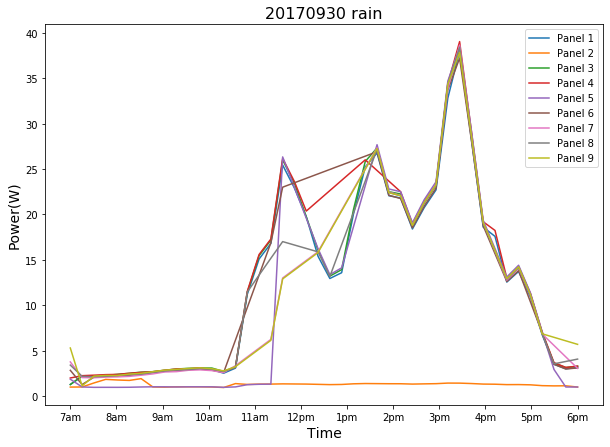

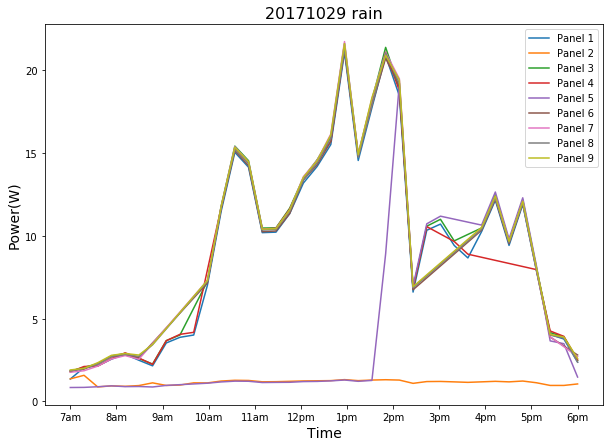

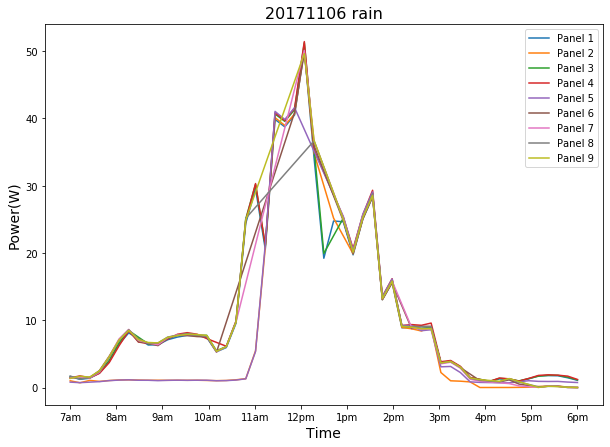

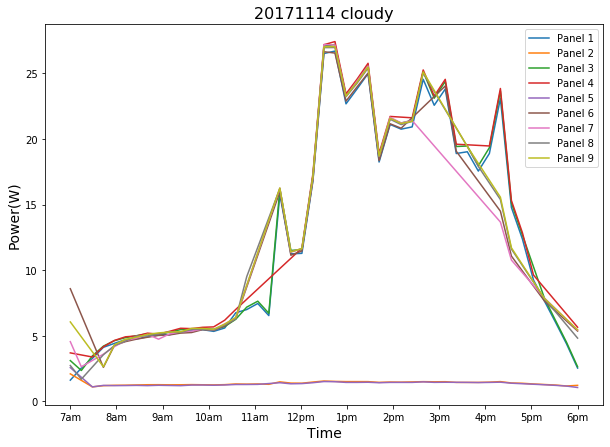

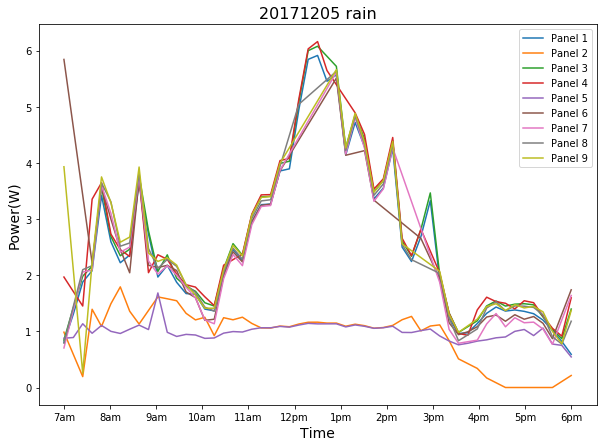

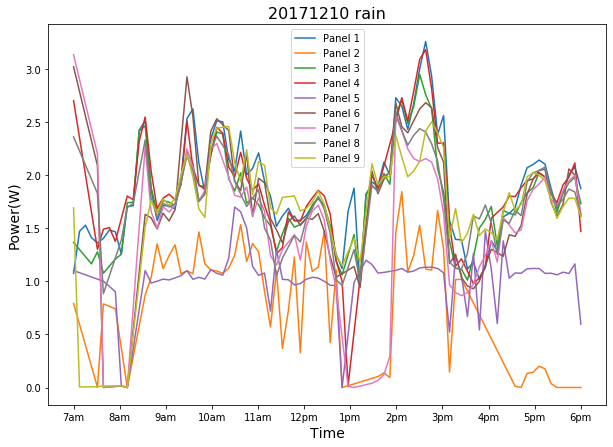

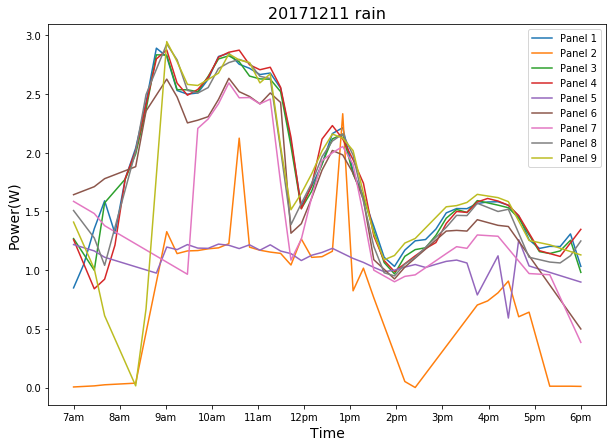

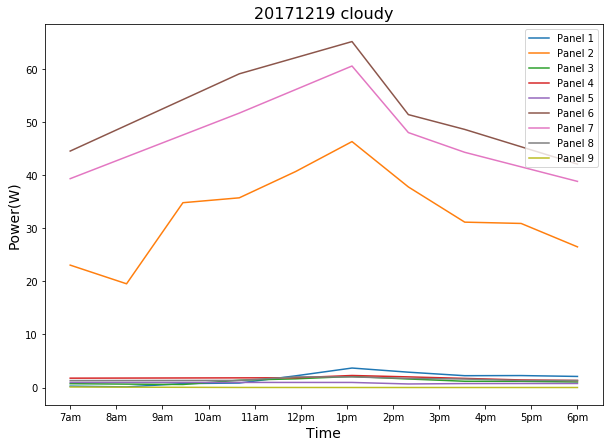

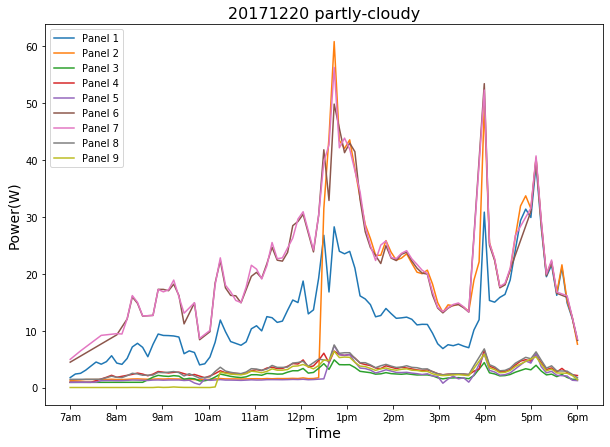

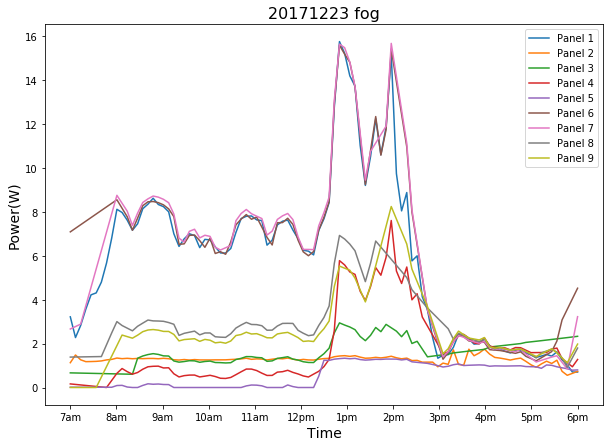

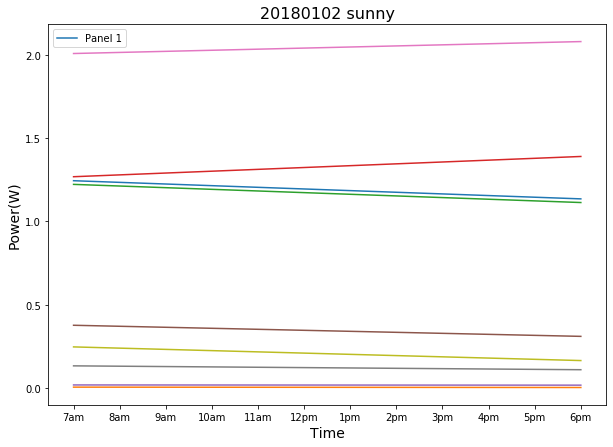

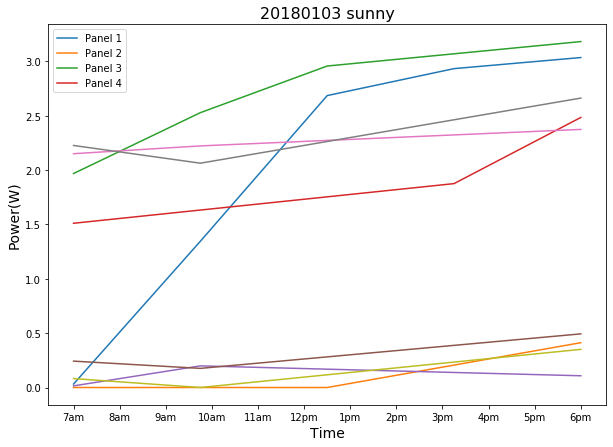

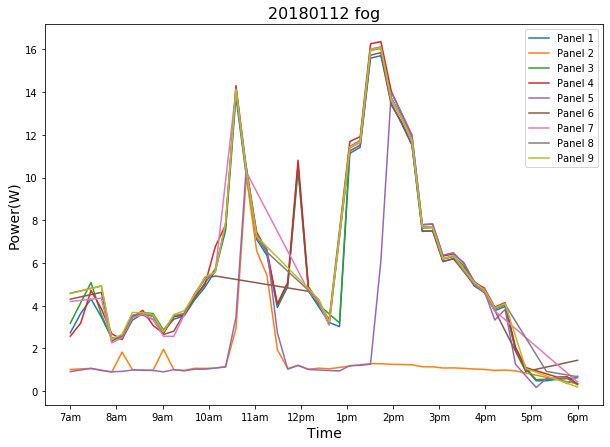

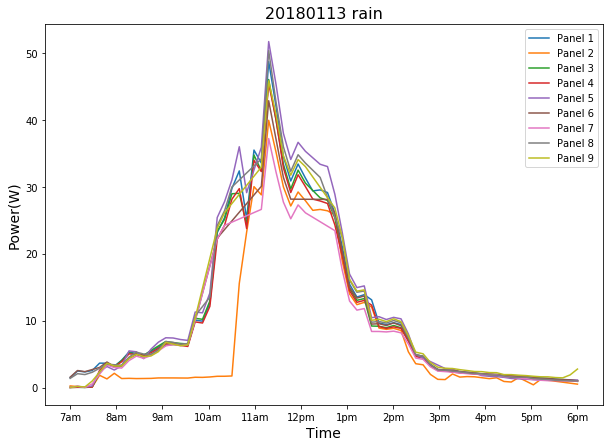

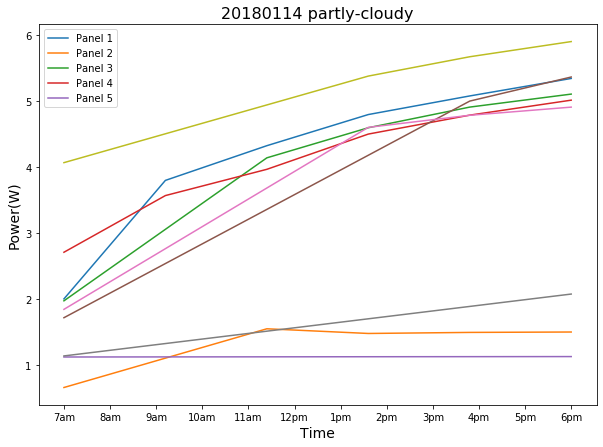

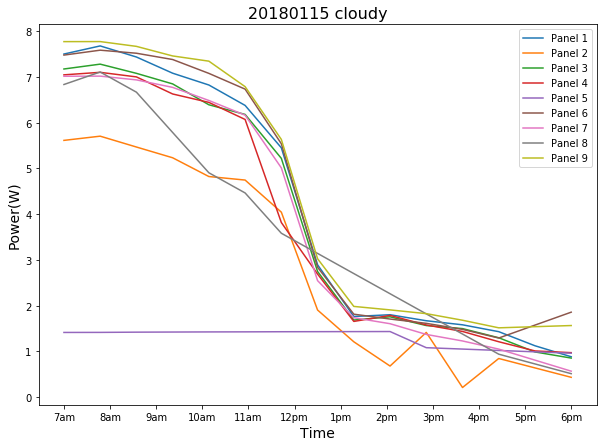

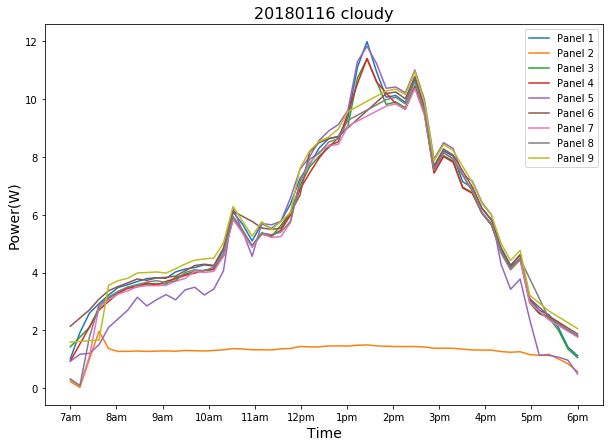

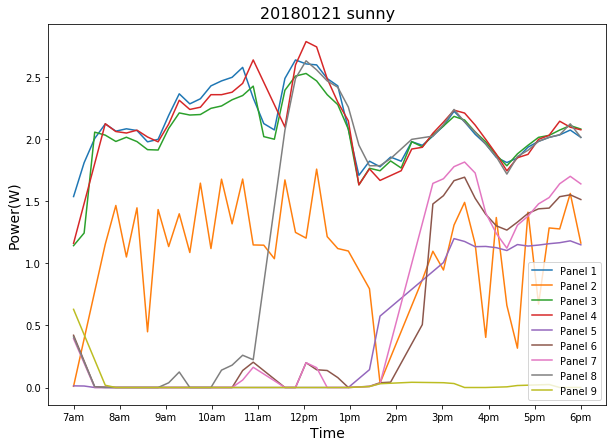

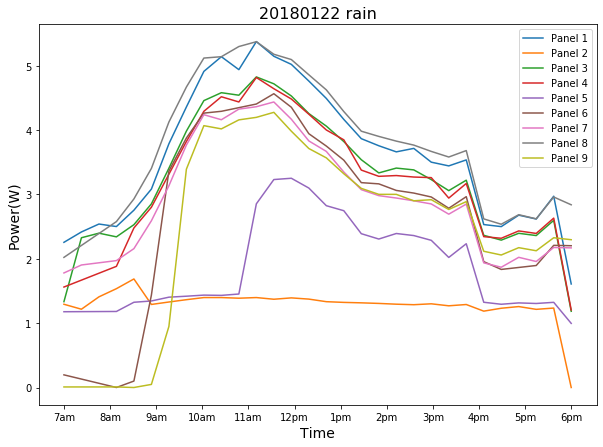

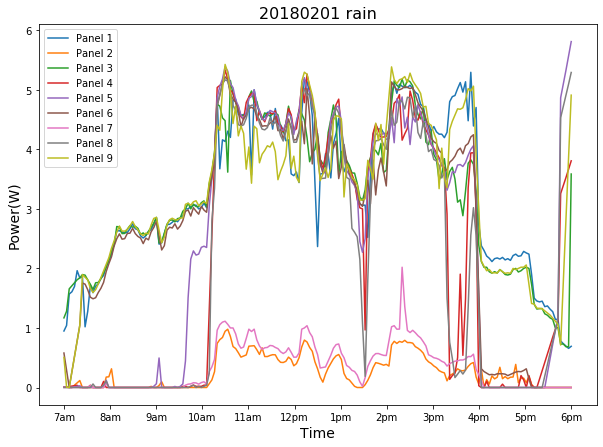

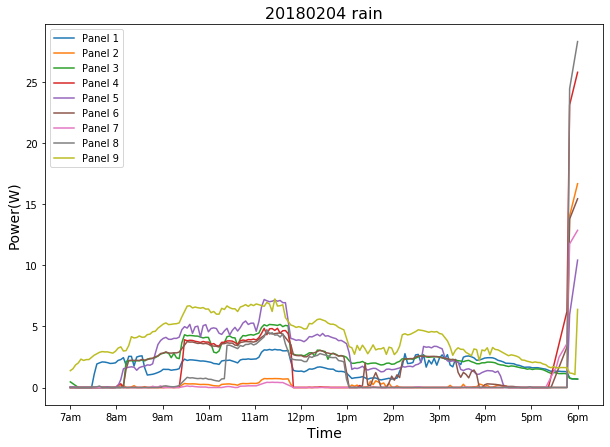

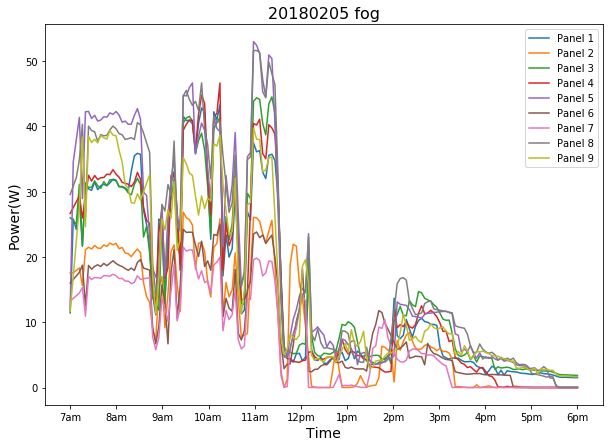

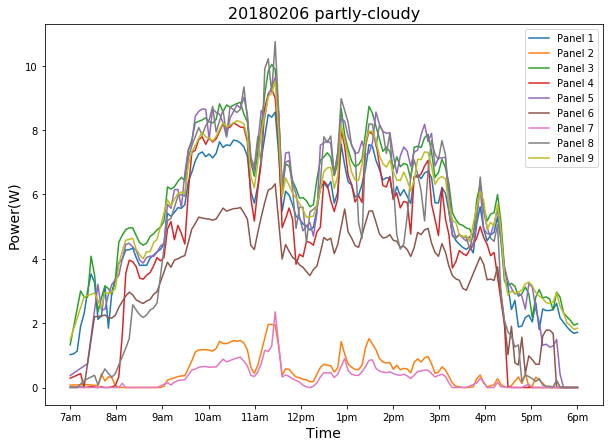

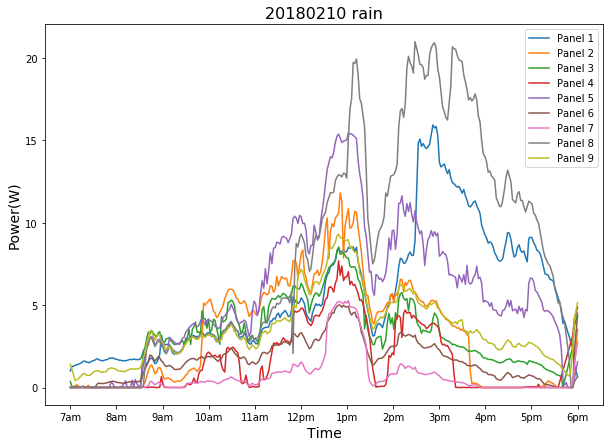

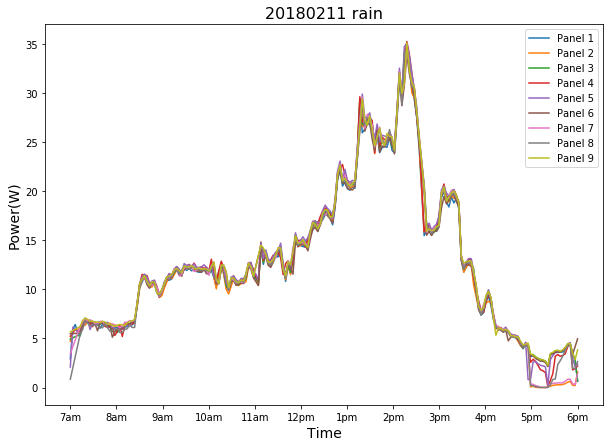

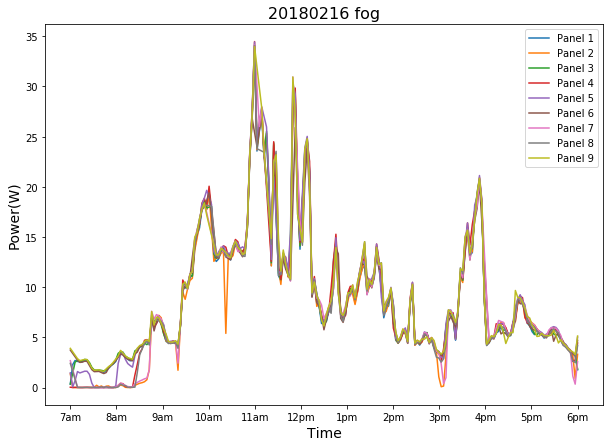

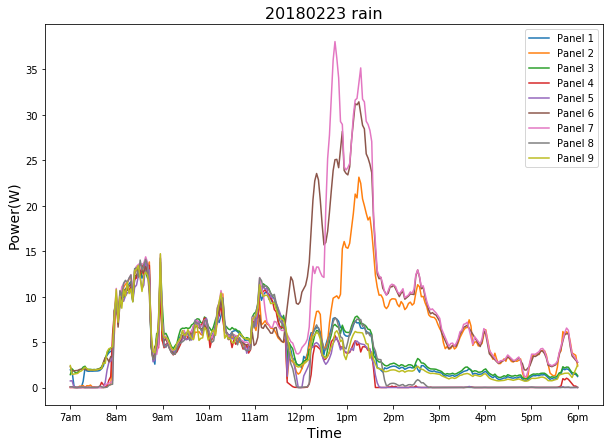

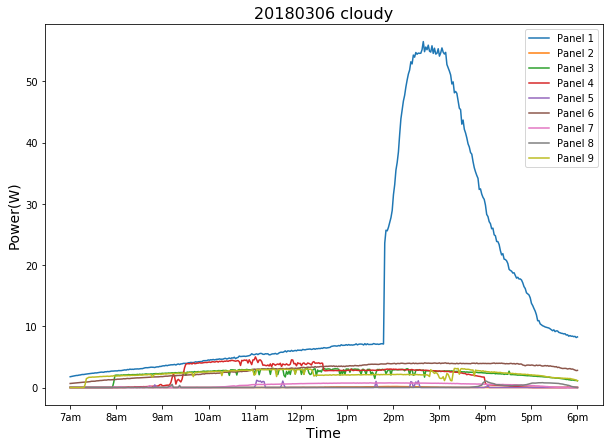

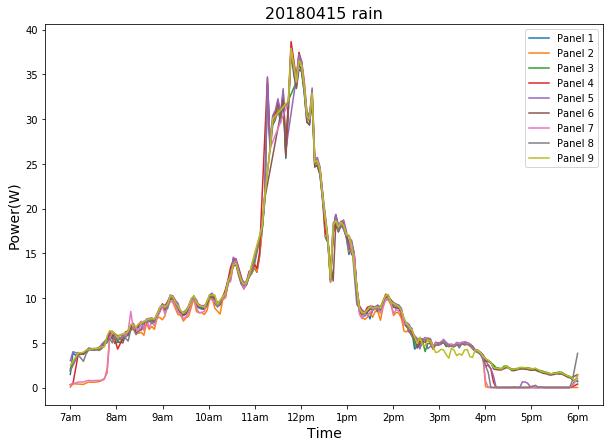

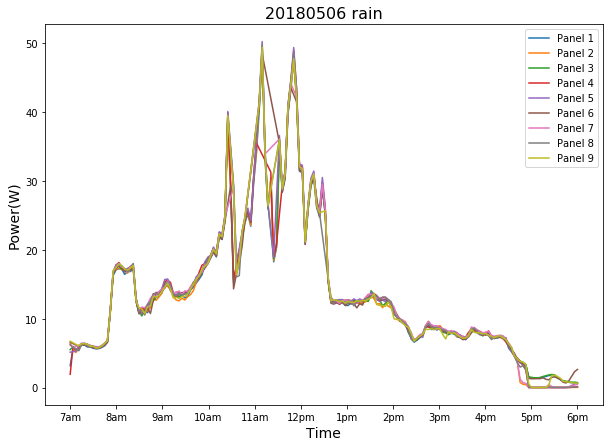

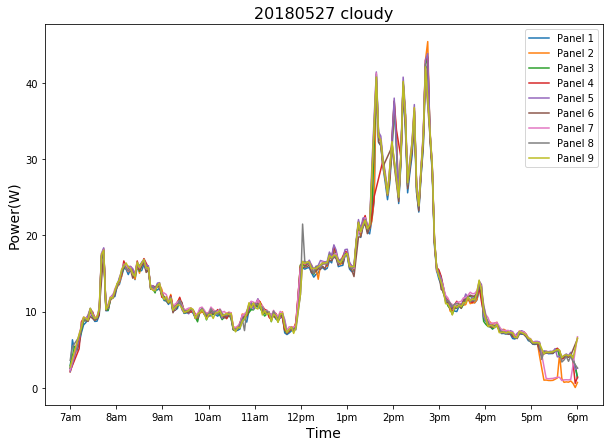

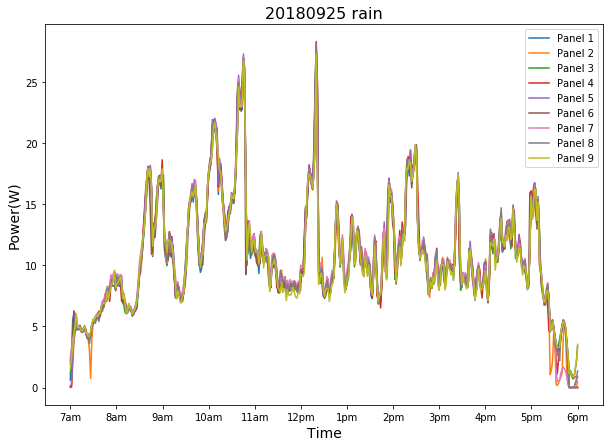

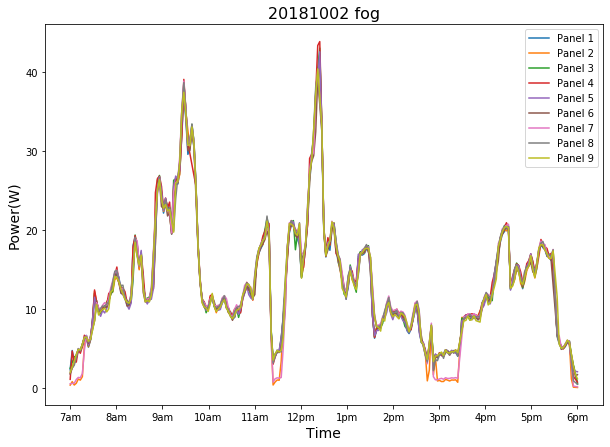

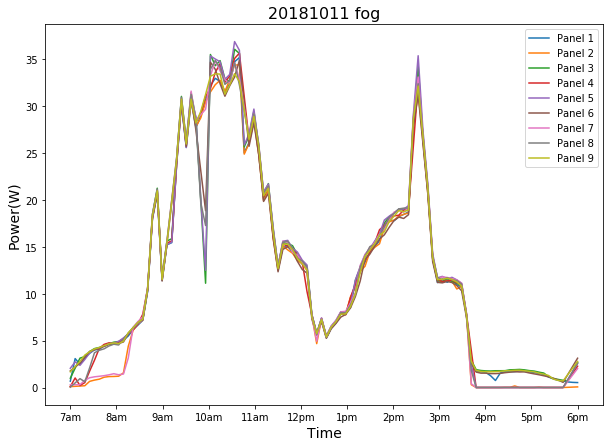

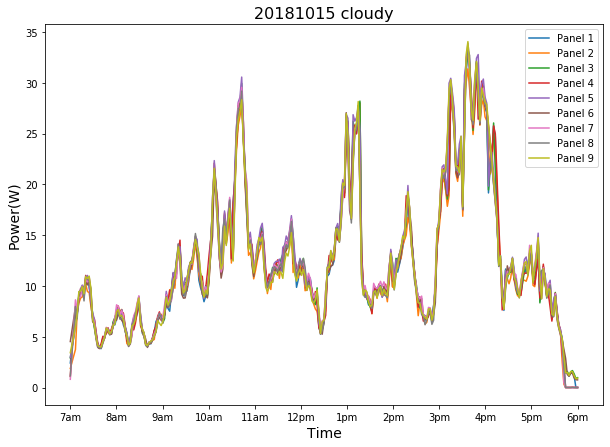

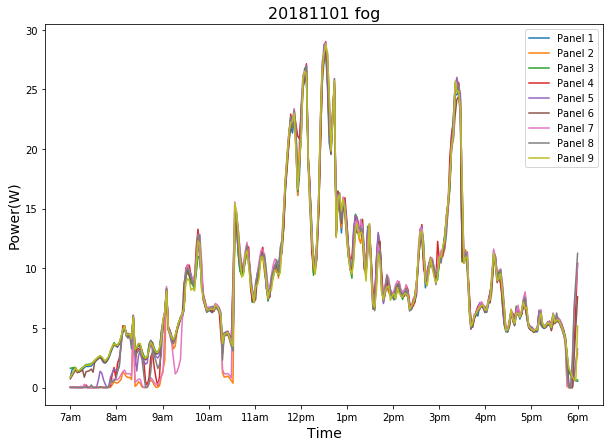

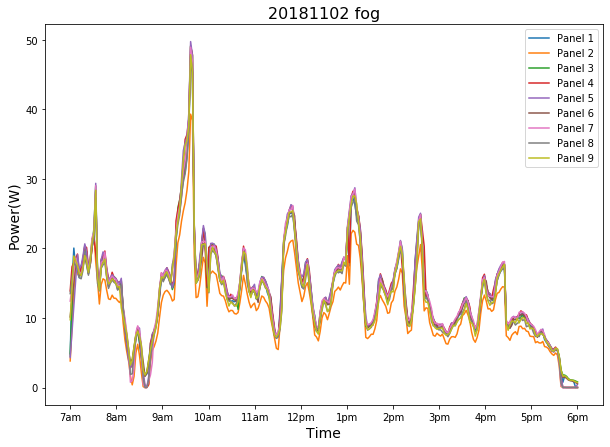

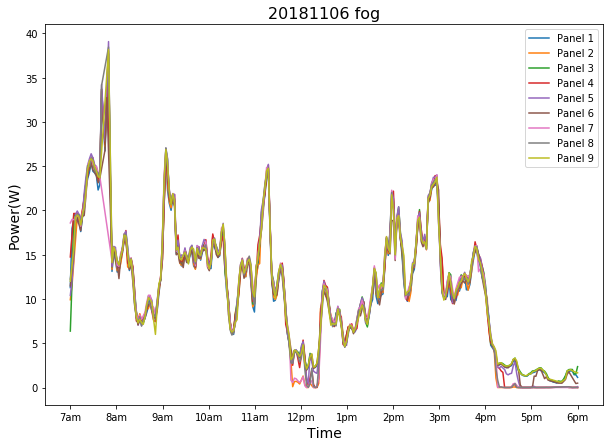

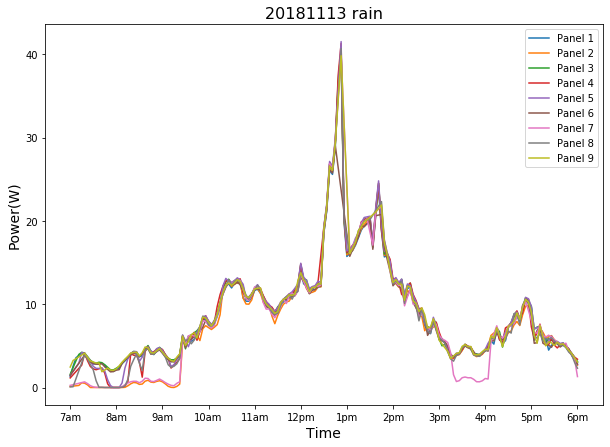

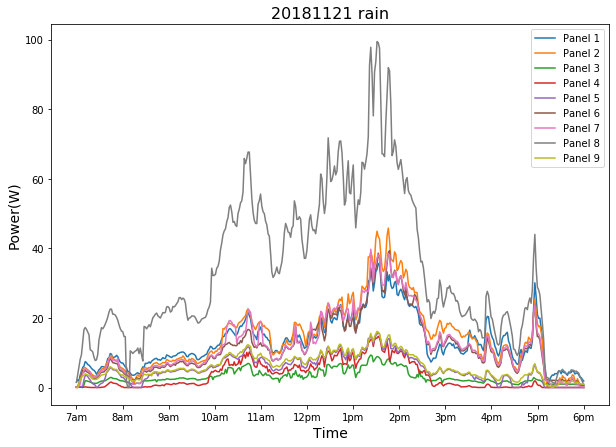

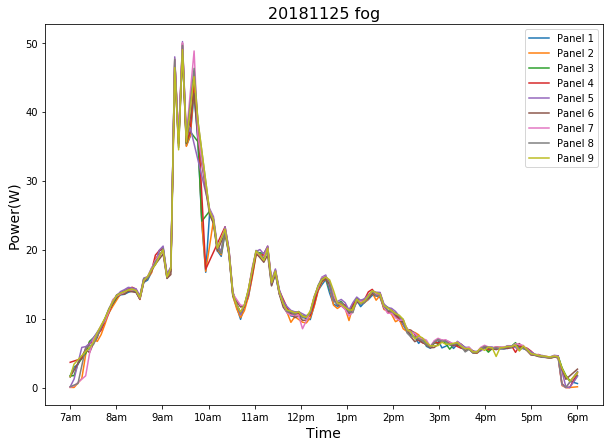

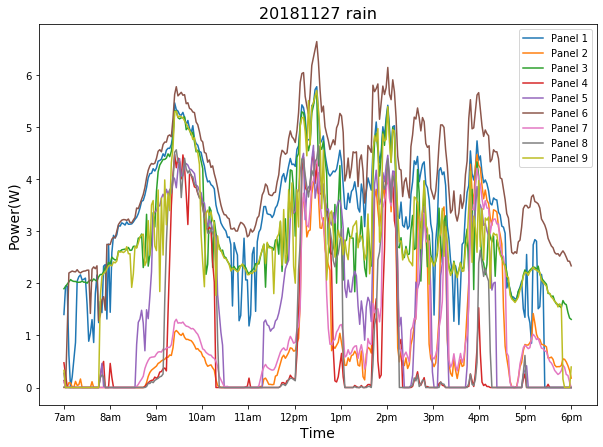

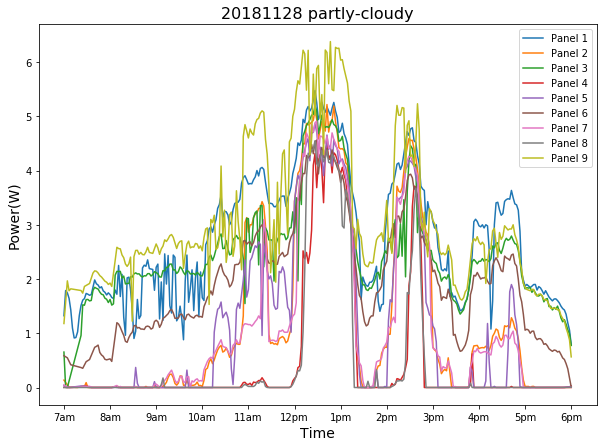

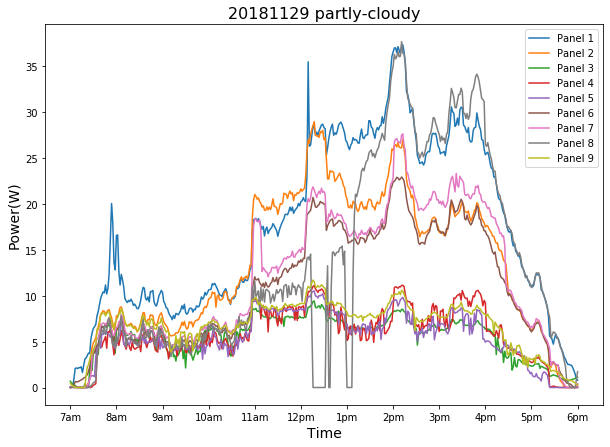

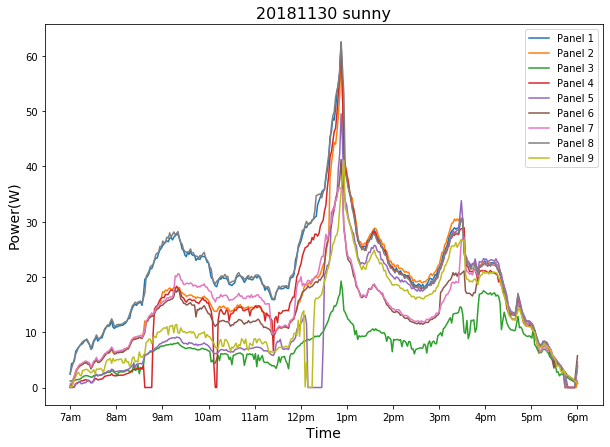

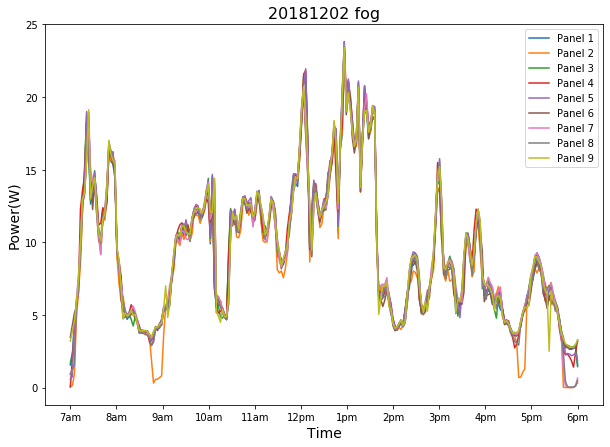

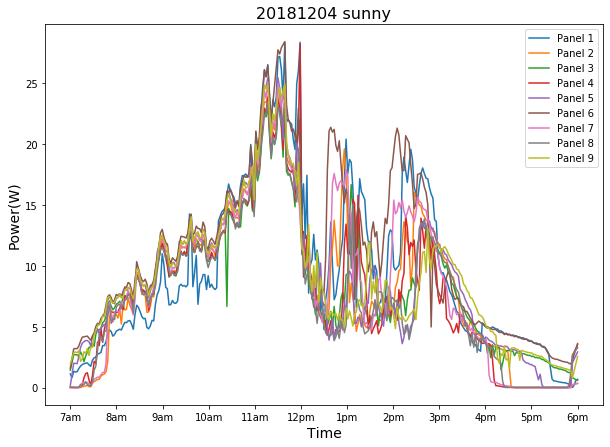

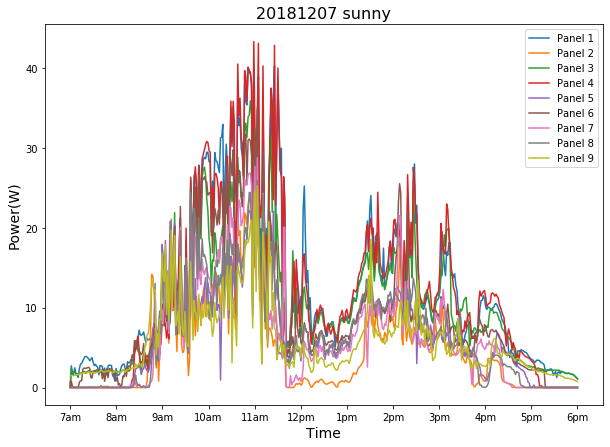

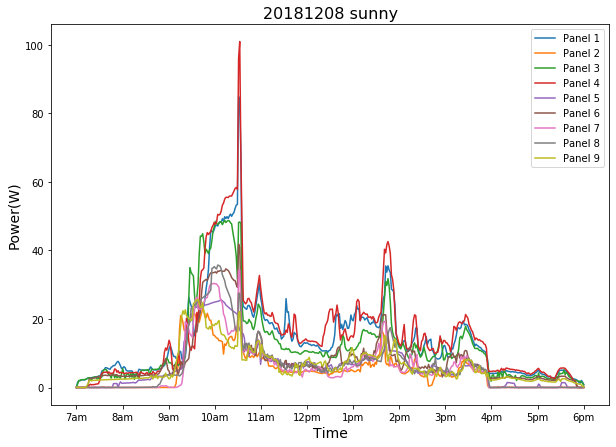

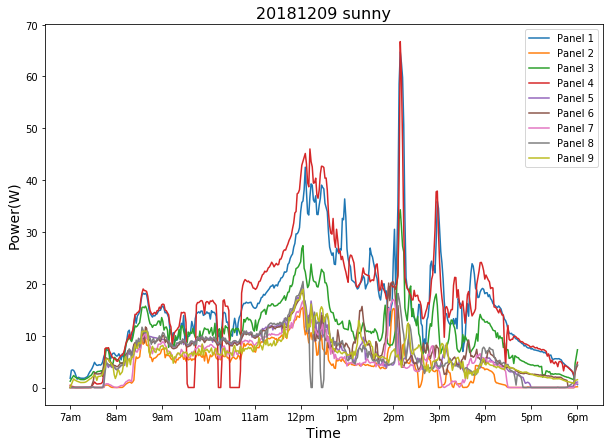

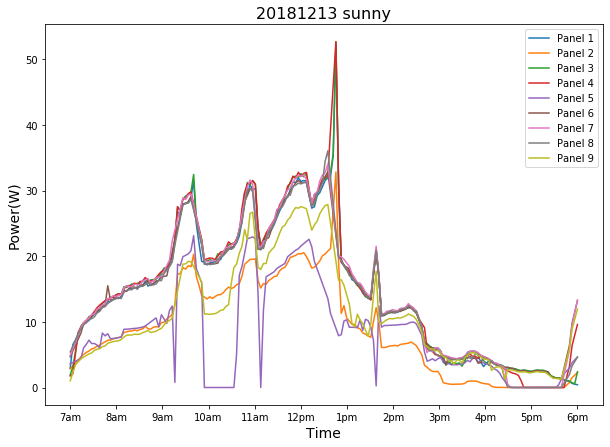

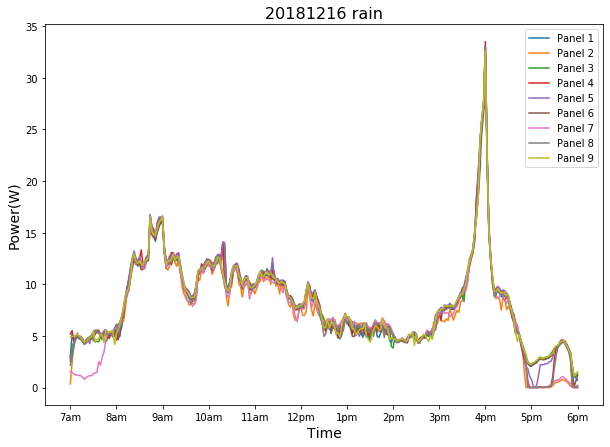

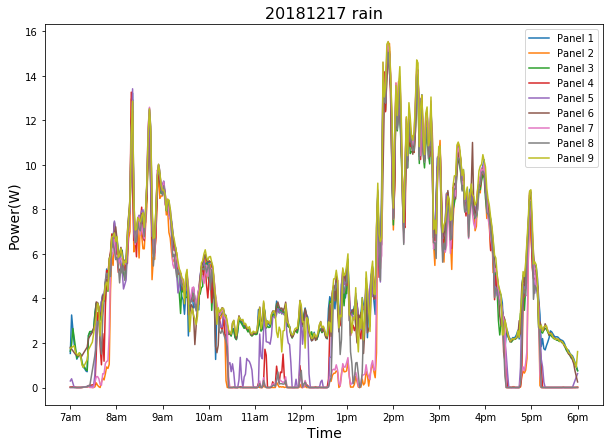

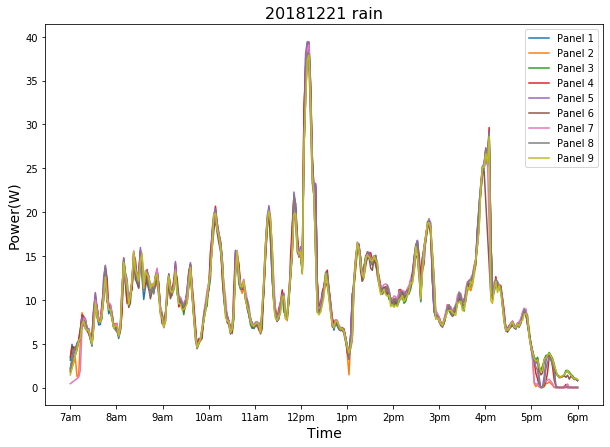

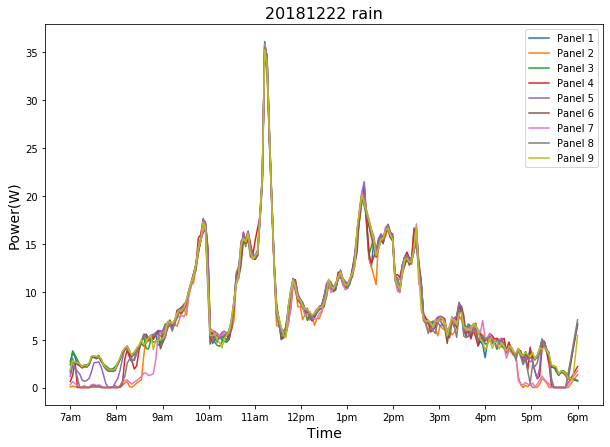

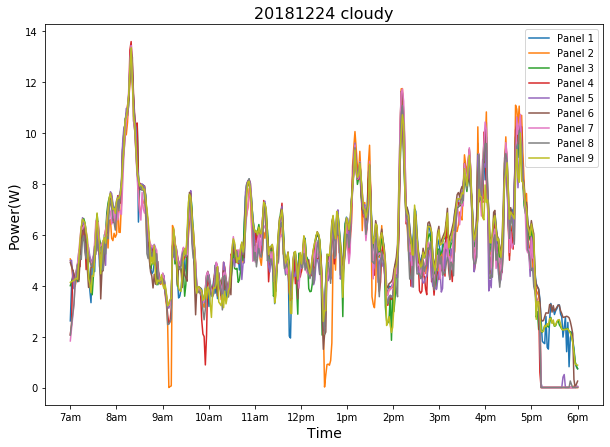

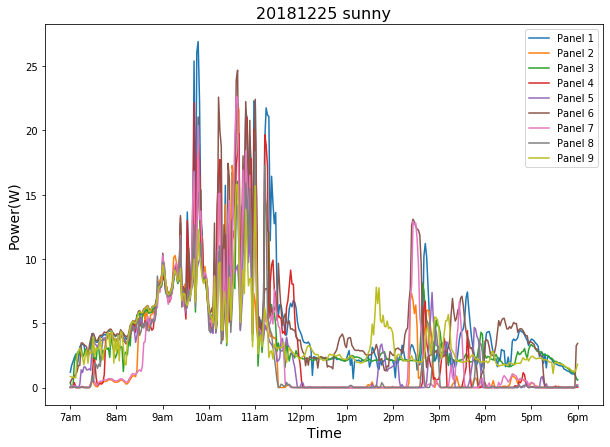

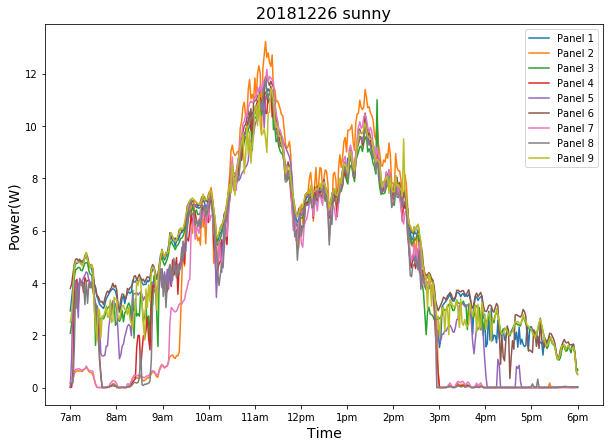

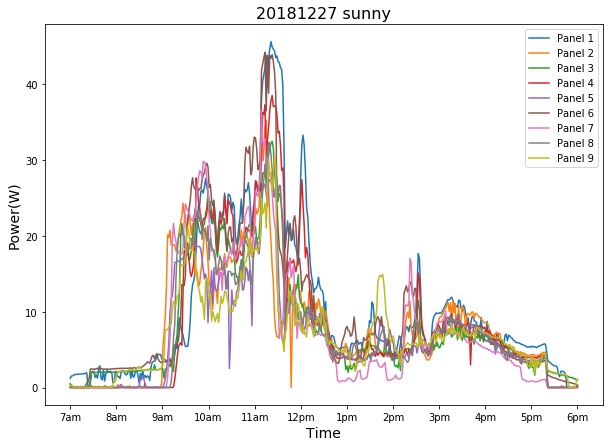

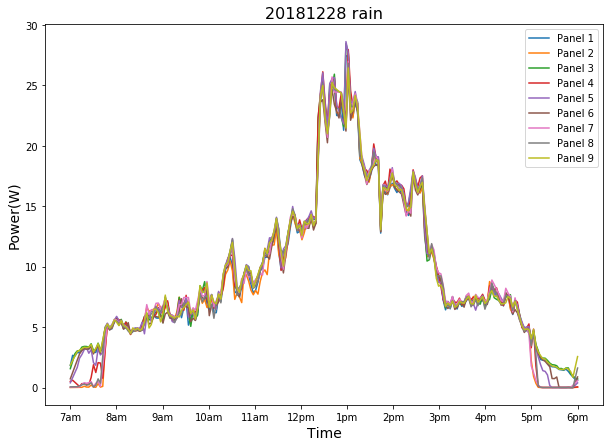

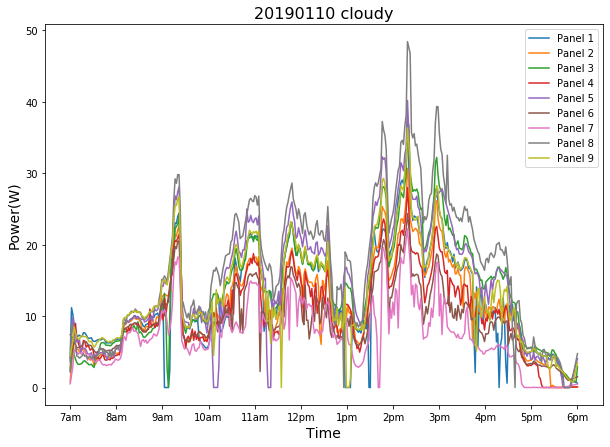

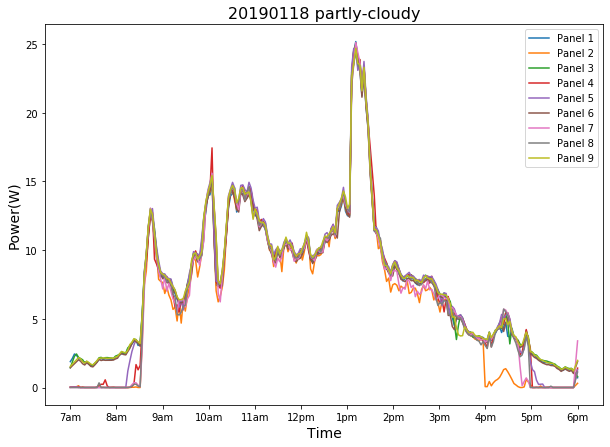

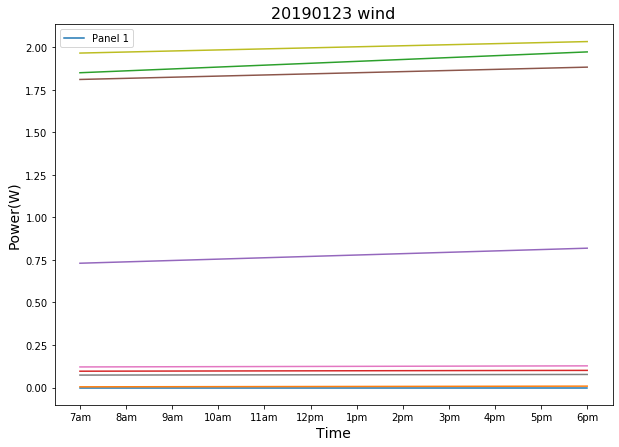

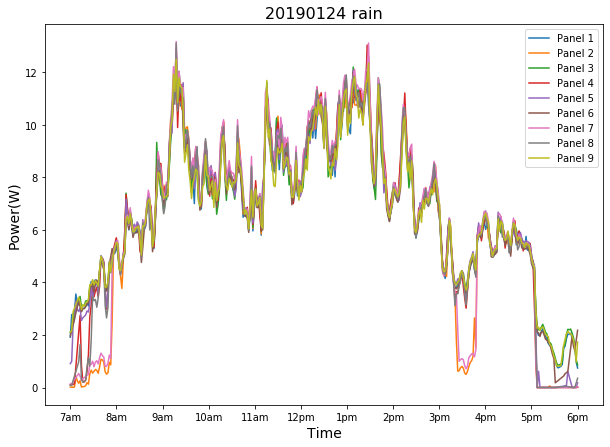

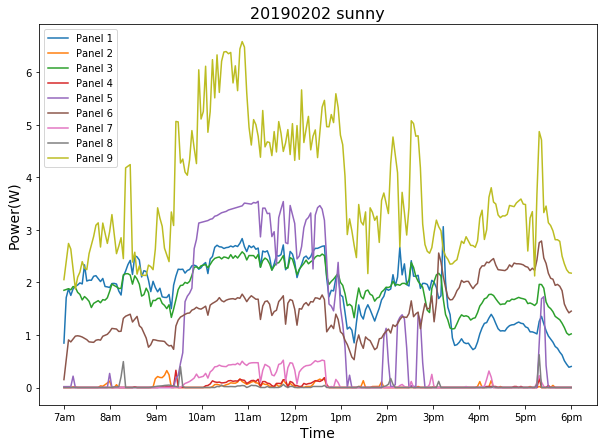

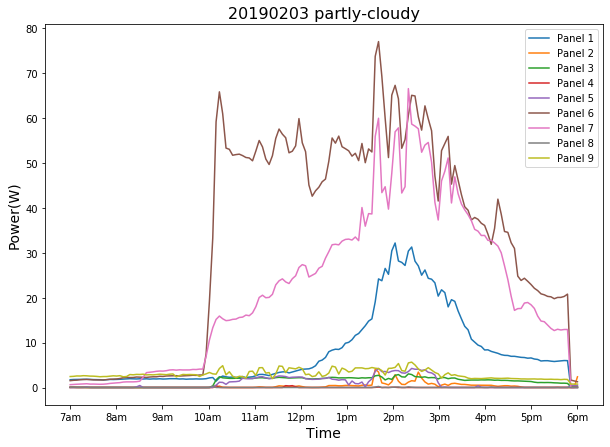

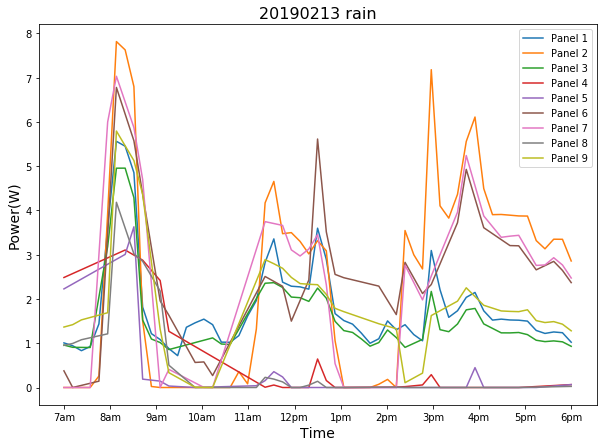

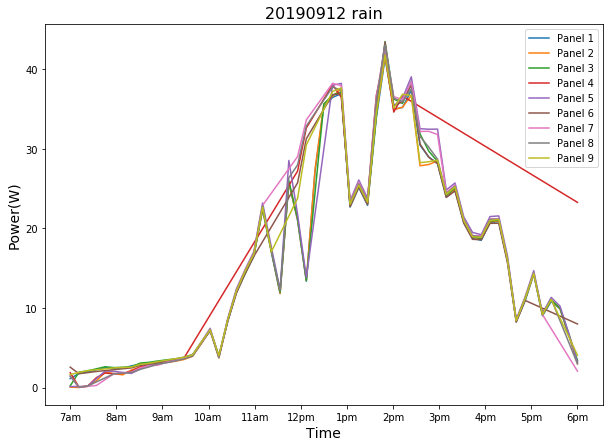

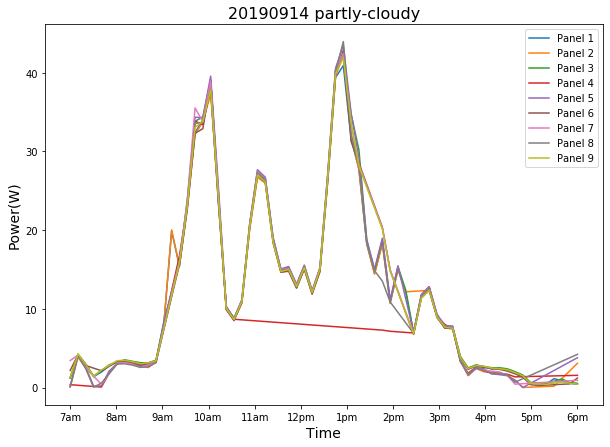

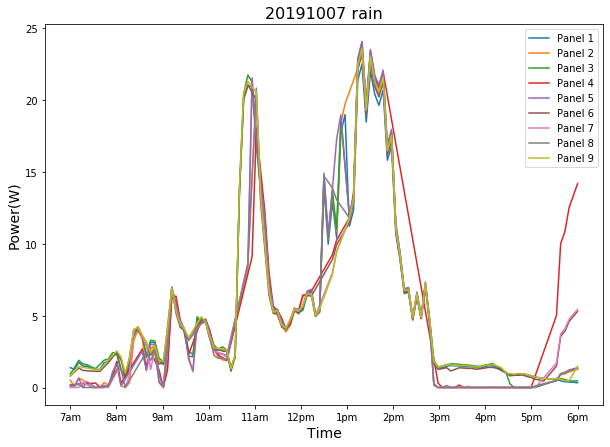

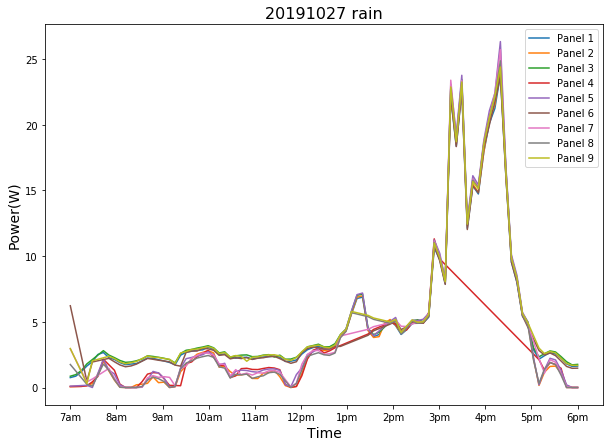

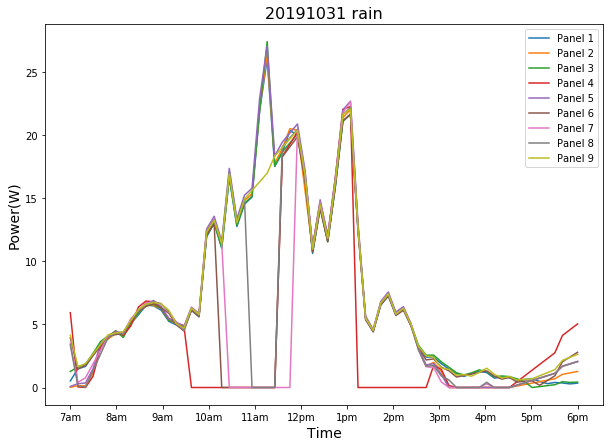

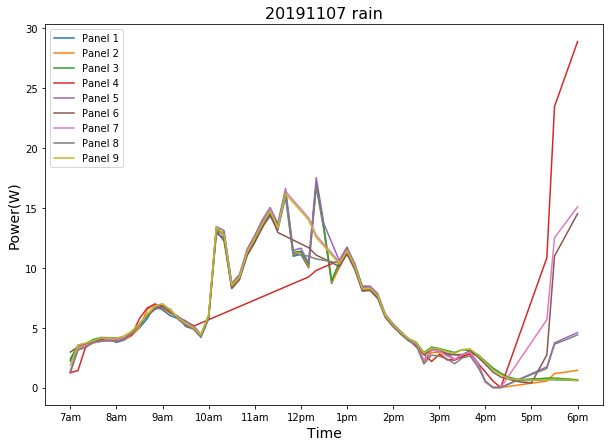

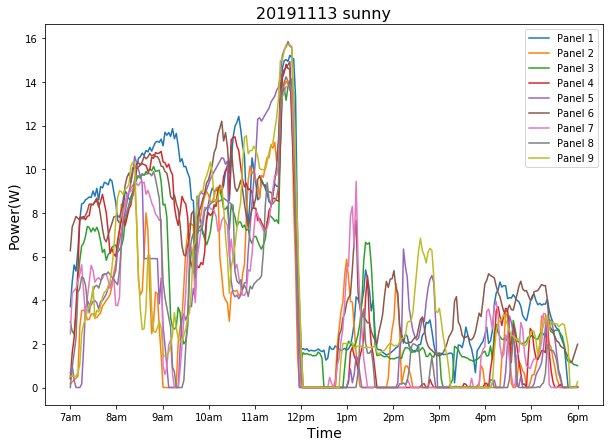

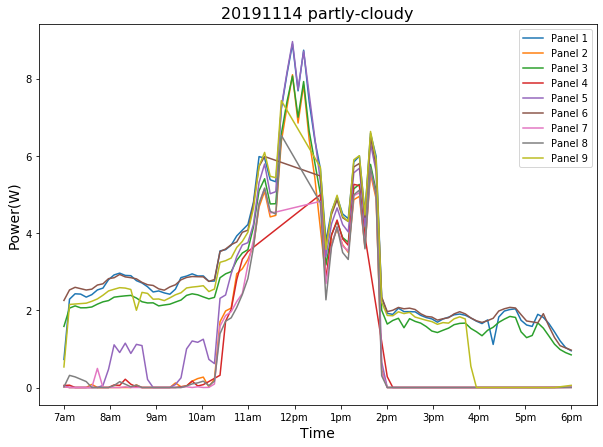

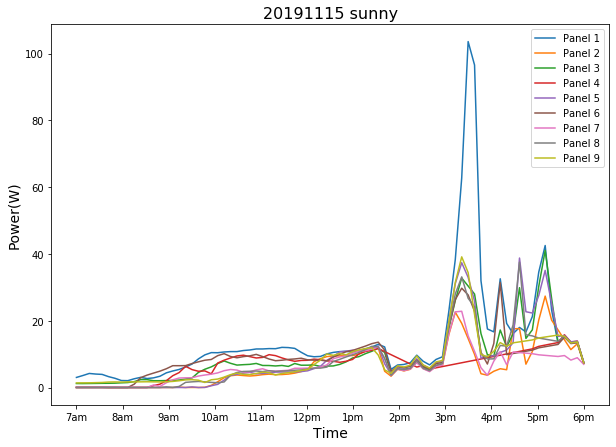

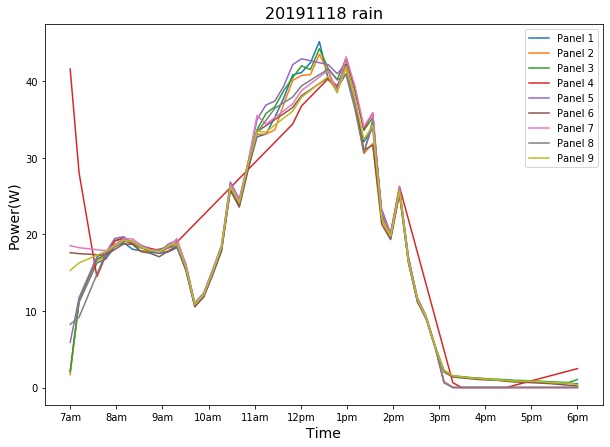

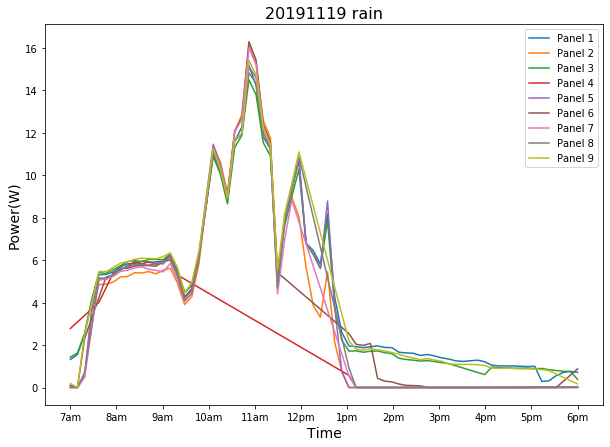

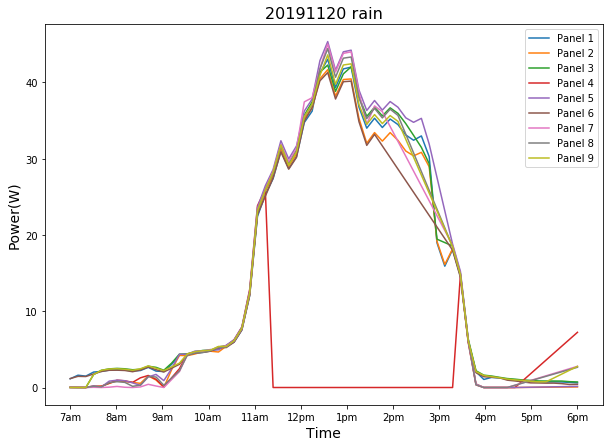

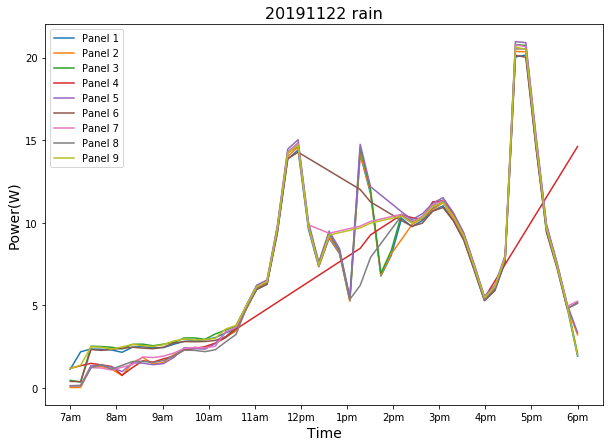

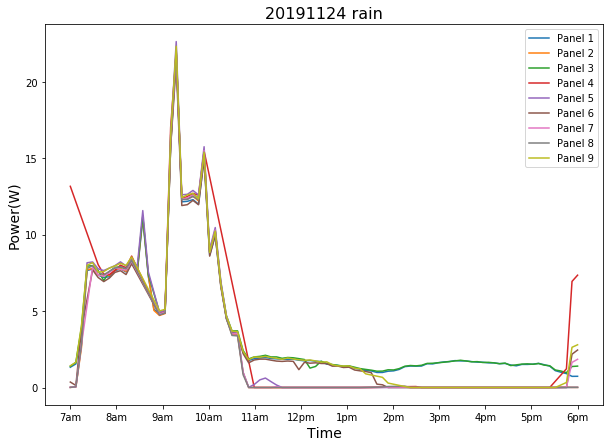

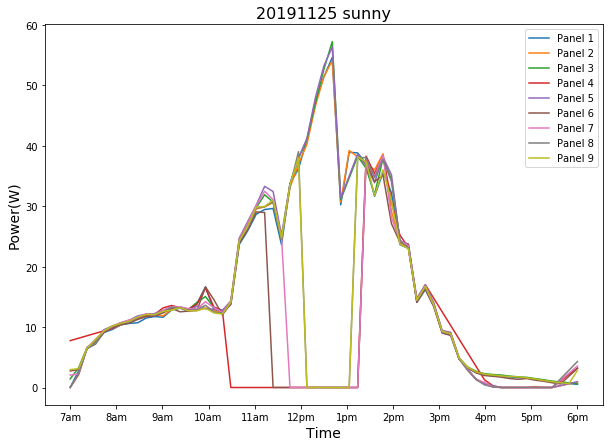

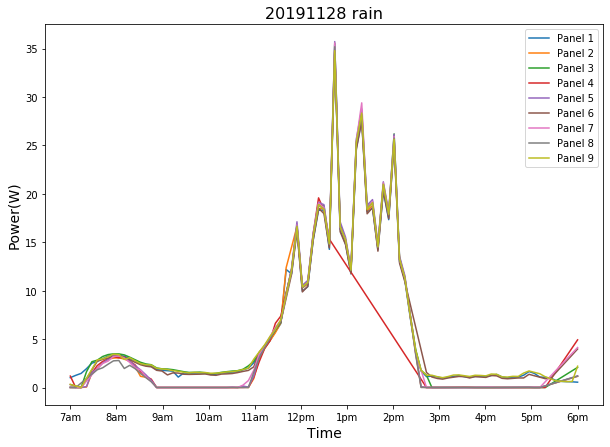

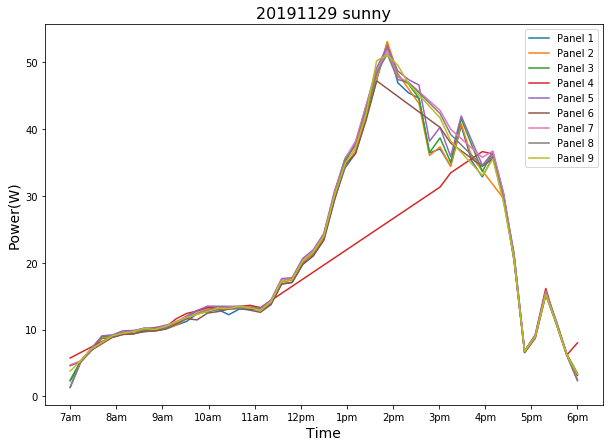

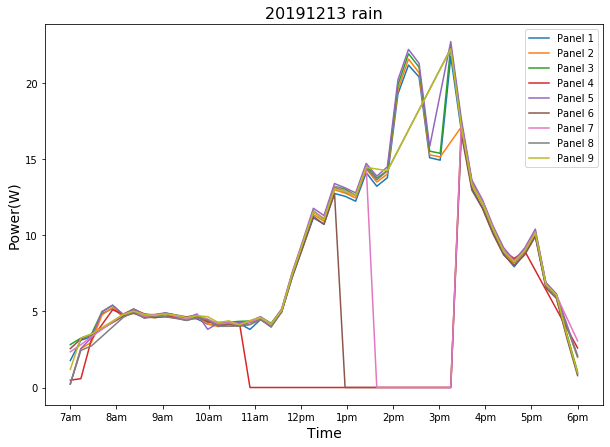

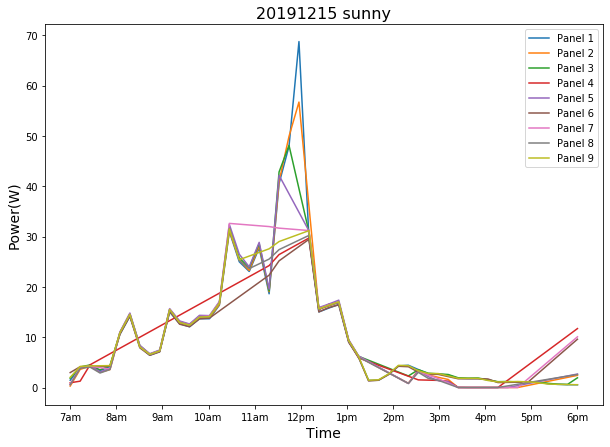

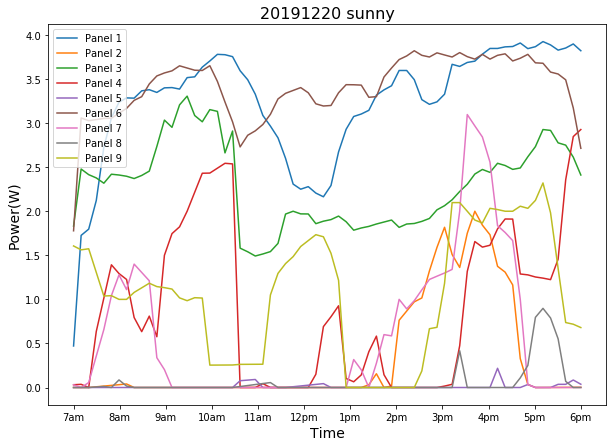

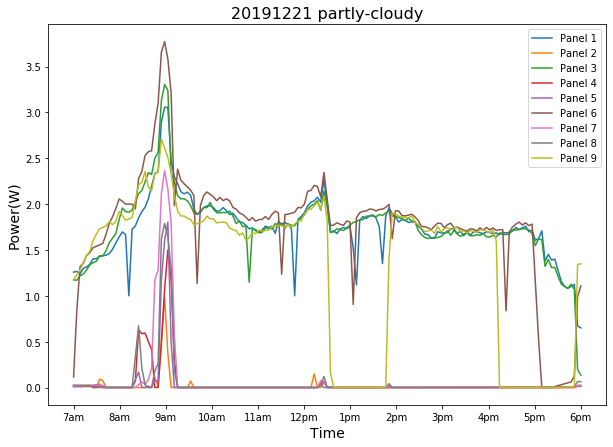

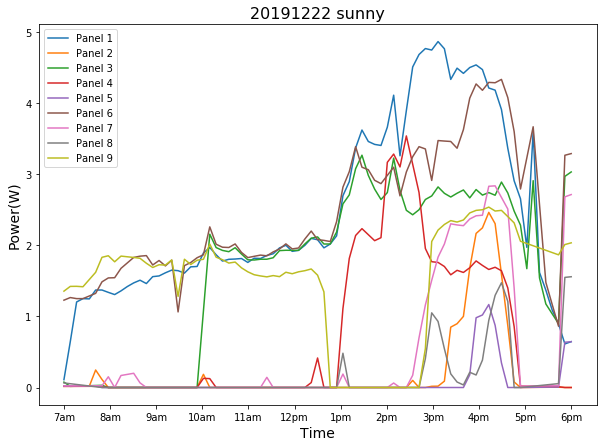

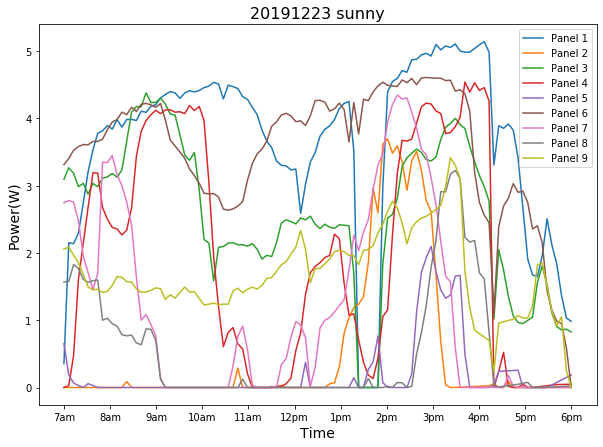

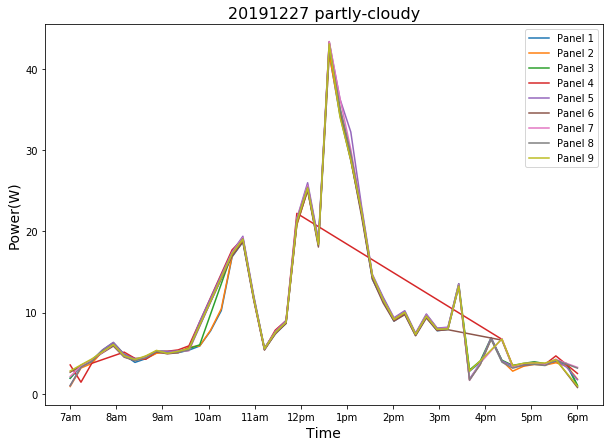

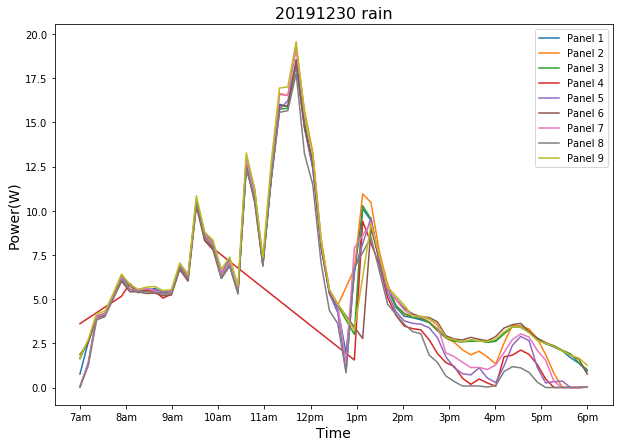

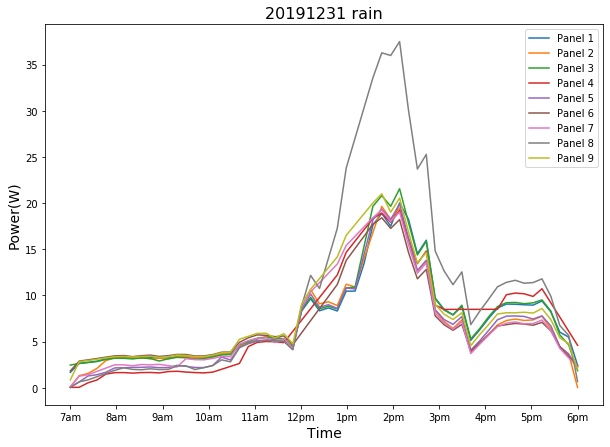

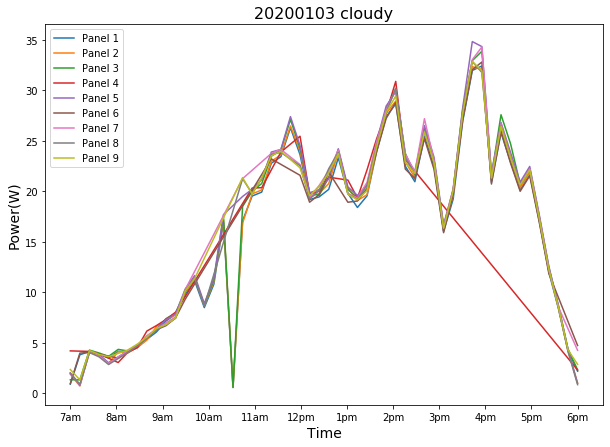

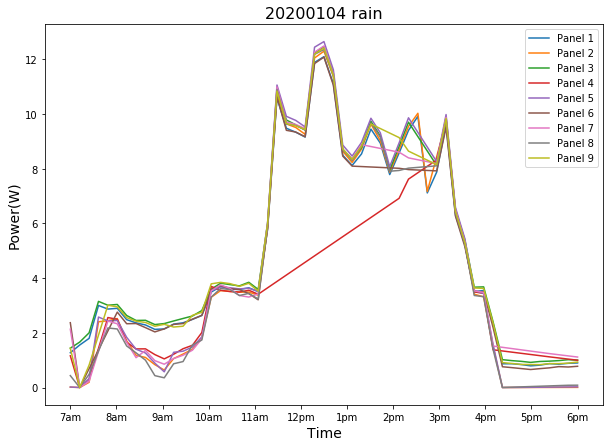

In [148]:
low_power_date = feature[feature['max_power']<=50][feature['weather']!='snow']['date'].values
weather_collect = []

low_power_day = []

for date in low_power_date:
    low_power_day.append(str(date))
    data = daily_data[str(date)]
    if data['weather'].values[0] != 'snow':
        weather = data['weather'].values[0]
        weather_collect.append(weather)
        data = data.drop(['weather','condition'],axis=1)
        title = str(date)+" "+weather
        visual.raw_data_plot(data,title,True,500)

In [184]:
unknown_defect = ['20171112','20171128','20171204','20180125','20180126','20180131',
                  '20180219','20180614','20180617','20180620','20180719','20181019',
                  '20181107','20181123','20181124','20181205','20181210','20181212',
                  '20190111','20190112','20190113','20190114','20190117','20190128',
                  '20190204','20190209','20190215','20191109','20191116','20191117',
                  '20191224','20191225','20200112']

In [180]:
# dataset[dataset['condition']==0][dataset['weather']!='snow']
less_corr_day = feature[feature['max_power']>50][feature['cond']==0]['date'].values

In [188]:
weather_collect = []
for date in unknown_defect:
#     if str(date) in unknown_defect:
#         continue
    data = daily_data[str(date)]
    weather = data['weather'].values[0]
    if weather == 'snow':
        continue
    weather_collect.append(weather)
#     data = data.drop(['weather','condition'],axis=1)
#     title = str(date)+" "+weather
#     visual.raw_data_plot(data,title,True,500)

In [128]:
snow_condition = []
days = set(dataset[dataset['weather']=='snow']['date_time'])

for day in days:
    
    if daily_data[str(day)].condition.values[0] == 1:
        snow_condition.append('normal')
    else:
        snow_condition.append('anomaly')

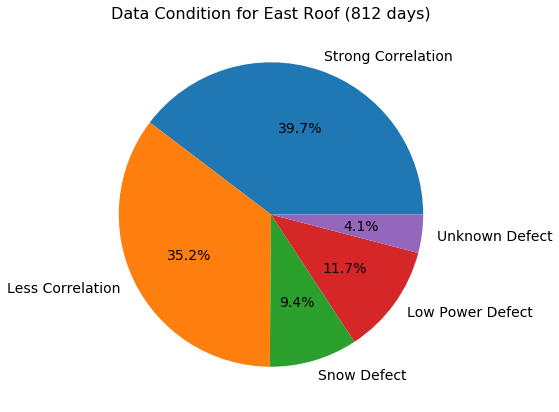

In [225]:
title = "Data Condition for East Roof (" +str(len(a)) + " days)"
visual.pie_chart(a,title,True,500)

In [218]:
a = ['Strong Correlation' for _ in range(322)]
b = ['Less Correlation' for _ in range(286)]
c = ['Snow Defect' for _ in range(76)]
d = ['Low Power Defect' for _ in range(95)]
e = ['Unknown Defect' for _ in range(33)]

In [219]:
a.extend(b)
a.extend(c)
a.extend(d)
a.extend(e)